In [1]:
import sys
sys.path.append('../')


from data.loader_dirichlet import *
from data.flowers102 import *
from data.oxford_pet import *

In [2]:
def load_pets(n_node, alpha=1.0, batch=128, val_rate=0.2, seed=0):
    """
    node_label : 
        the list of labes that each node has. (example. [[0,1],[1,2],[0,2]] (n_node=3, n_class=2))
    """

    transform_train = transforms.Compose([
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

    transform_test = transforms.Compose([
        transforms.Resize(256), 
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

    
    train_val_dataset =  OxfordIIITPet(root="../data", split="trainval", download=True, transform=transform_train)
    test_dataset =  OxfordIIITPet(root="../data", split="test", download=True, transform=transform_train)
    
    # split datasets into n_node datasets by Dirichlet distribution. 
    train_val_subset_list = dirichlet_split(train_val_dataset, n_node, alpha, seed=seed)
        
    # the number of train datasets per node.
    n_data = min([len(train_val_subset_list[node_id]) for node_id in range(n_node)])
    n_train = int((1.0 - val_rate) * n_data)
    
    # choose validation datasets.
    val_dataset = None
    train_subset_list = []
    for node_id in range(n_node):
        n_val = len(train_val_subset_list[node_id]) - n_train
        a, b = torch.utils.data.random_split(train_val_subset_list[node_id], [n_train, n_val])
        train_subset_list.append(a)
        
        if val_dataset is None:
            val_dataset = b
        else:
            val_dataset += b
                  
    return {'train': train_subset_list, 'val': val_dataset, 'test': test_dataset}

In [22]:
transform_train = transforms.Compose([
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_val_dataset =  OxfordIIITPet(root="../data", split="trainval", download=True, transform=transform_train)
test_dataset =  OxfordIIITPet(root="../data", split="test", download=True, transform=transform_train)

In [23]:
len(train_val_dataset) + len(test_dataset)

7349

In [3]:
my_datasets = load_pets(25, alpha=10.0)

for i in range(25):
    counter = [0 for _ in range(37)]

    for data, label in my_datasets["train"][i]:
    
        counter[label] +=1

    print(counter, sum(counter))

[4, 2, 3, 3, 4, 2, 3, 4, 3, 3, 6, 2, 1, 6, 4, 3, 2, 5, 4, 5, 3, 3, 5, 2, 1, 2, 3, 2, 2, 5, 3, 3, 2, 3, 2, 3, 4] 117
[3, 4, 4, 3, 3, 3, 3, 4, 3, 7, 1, 1, 3, 4, 1, 3, 4, 4, 4, 2, 3, 4, 3, 2, 2, 4, 2, 2, 2, 3, 4, 2, 2, 5, 3, 4, 6] 117
[1, 5, 4, 3, 3, 4, 4, 6, 3, 6, 4, 3, 4, 3, 2, 3, 1, 5, 2, 2, 2, 4, 2, 2, 5, 3, 2, 5, 3, 2, 3, 5, 3, 3, 2, 3, 0] 117
[3, 2, 6, 2, 4, 2, 6, 3, 3, 5, 3, 2, 4, 3, 4, 4, 2, 2, 3, 6, 4, 2, 4, 3, 3, 3, 1, 3, 3, 5, 2, 6, 2, 3, 2, 2, 0] 117
[6, 3, 5, 2, 5, 3, 1, 1, 4, 4, 3, 3, 2, 0, 2, 1, 2, 5, 2, 3, 5, 1, 3, 5, 3, 3, 4, 4, 3, 4, 2, 5, 5, 2, 2, 5, 4] 117
[5, 4, 6, 2, 6, 2, 5, 2, 3, 1, 6, 3, 2, 1, 5, 4, 3, 4, 2, 2, 4, 6, 3, 3, 3, 2, 1, 3, 1, 2, 4, 3, 3, 3, 2, 2, 4] 117
[5, 2, 1, 3, 4, 3, 2, 4, 1, 1, 3, 4, 3, 2, 3, 5, 1, 3, 5, 2, 3, 4, 3, 3, 2, 3, 2, 4, 2, 3, 1, 5, 2, 7, 3, 5, 8] 117
[3, 1, 2, 3, 5, 2, 2, 3, 3, 2, 4, 2, 4, 6, 3, 4, 2, 4, 4, 4, 3, 2, 2, 5, 3, 2, 4, 7, 1, 3, 4, 3, 2, 3, 5, 5, 0] 117
[2, 2, 2, 3, 4, 3, 3, 5, 4, 5, 3, 3, 5, 5, 3, 2, 5, 2, 5, 1, 0, 4, 4, 4,

In [17]:
my_datasets = load_pets(25, alpha=0.1)

for i in range(25):
    counter = [0 for _ in range(37)]

    for data, label in my_datasets["train"][i]:
    
        counter[label] +=1

    print(counter, sum(counter))

[0, 0, 1, 0, 36, 0, 3, 0, 0, 6, 0, 22, 0, 2, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 2, 0, 10, 0, 0] 117
[0, 0, 20, 11, 0, 21, 0, 1, 0, 0, 0, 1, 0, 1, 0, 24, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 13, 20] 117
[0, 0, 0, 0, 0, 0, 18, 0, 0, 17, 0, 5, 0, 0, 0, 1, 0, 4, 0, 4, 2, 15, 0, 0, 0, 11, 0, 5, 2, 22, 0, 0, 0, 0, 0, 4, 7] 117
[0, 22, 6, 13, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 22, 0, 5, 0, 0, 13, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 17, 0] 117
[15, 5, 0, 0, 0, 2, 1, 0, 1, 7, 26, 0, 2, 0, 1, 3, 0, 17, 1, 2, 1, 7, 0, 0, 0, 2, 0, 22, 0, 0, 2, 0, 0, 0, 0, 0, 0] 117
[9, 0, 0, 0, 0, 0, 7, 20, 0, 3, 10, 0, 3, 0, 0, 6, 1, 0, 0, 0, 0, 1, 33, 0, 0, 0, 0, 1, 0, 2, 0, 0, 21, 0, 0, 0, 0] 117
[0, 0, 1, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 28, 0, 0, 4, 0, 0, 0, 20, 6, 0, 0, 0, 0, 0, 3, 1, 11, 1, 15, 2, 4, 0, 0, 0] 117
[0, 0, 0, 0, 0, 0, 0, 2, 6, 4, 0, 4, 10, 0, 13, 0, 0, 9, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 25, 0, 0, 0, 0, 31, 11, 0, 0] 117
[5, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,

In [18]:
counter = [0 for _ in range(37)]

for data, label in my_datasets["val"]:    
    counter[label] +=1

print(counter, sum(counter))

[28, 14, 25, 11, 20, 21, 17, 17, 21, 15, 18, 11, 20, 16, 22, 26, 27, 27, 20, 24, 27, 25, 19, 21, 17, 19, 19, 23, 19, 12, 21, 25, 21, 22, 20, 21, 24] 755


In [19]:
counter = [0 for _ in range(37)]

for data, label in my_datasets["test"]:    
    counter[label] +=1

print(counter, sum(counter))

[98, 100, 100, 100, 100, 100, 100, 88, 99, 100, 100, 97, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 89, 100, 100] 3669


19
21
25
29
29
27
27
29
9


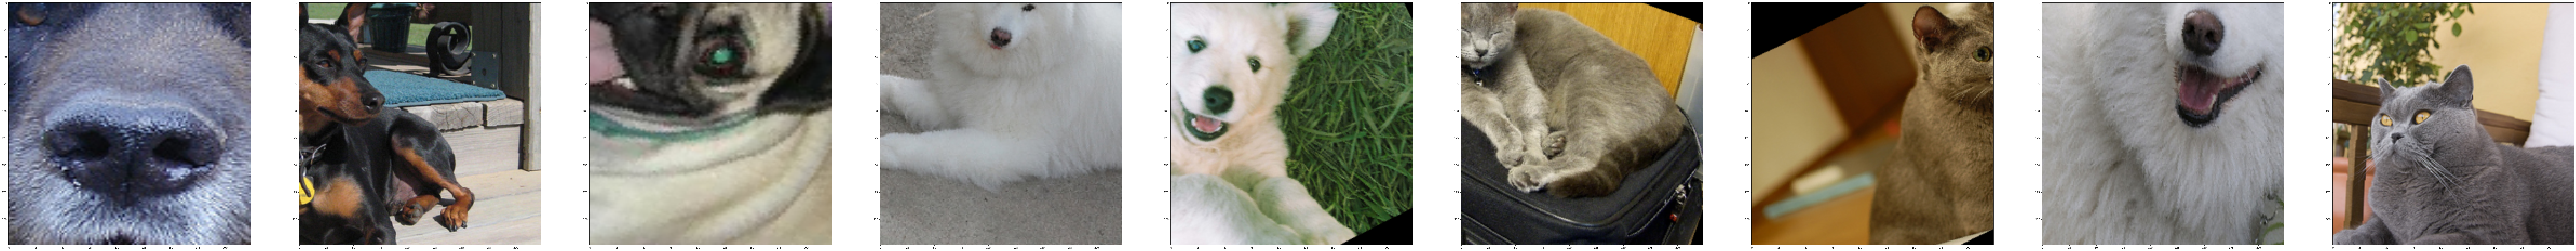

In [15]:
plt.figure(figsize=(20*10, 20))
counter = 1
for data, label in my_datasets["train"][2]:
    ax = plt.subplot(1, 10, counter)
    ax.imshow(data.permute(1,2,0))
    print(label)
    
    counter += 1
    if counter == 10:
        break
    

In [6]:
label

18